In [2]:
from fastai.imports import *
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import graphviz
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import accuracy_score, classification_report

sns_palette = sns.color_palette("muted")


In [3]:


df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")
dep = 'Approved'

df[dep] = labels.label.astype(int)

df.loc[df[dep] == 1, 'Status'] = 'Approved'
df.loc[df[dep] == 0, 'Status'] = 'Declined'
print('Total records:', len(df))


Total records: 1548


C:\Users\egors\AppData\Local\Temp\ipykernel_21612\2857228115.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Approved' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df[dep] == 1, 'Status'] = 'Approved'


In [4]:
df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approved,Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,Approved
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Approved
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved


In [5]:
df.drop('Ind_ID', axis=1).describe()


,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Approved
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [6]:
print('Modes')
print('----------------------')
df.drop('Ind_ID', axis=1).mode().iloc[0]


Modes
----------------------


GENDER                                         F
Car_Owner                                      N
Propert_Owner                                  Y
CHILDREN                                     0.0
Annual_income                           135000.0
Type_Income                              Working
EDUCATION          Secondary / secondary special
Marital_status                           Married
Housing_type                   House / apartment
Birthday_count                          -22655.0
Employed_days                           365243.0
Mobile_phone                                 1.0
Work_Phone                                   0.0
Phone                                        0.0
EMAIL_ID                                     0.0
Type_Occupation                         Laborers
Family_Members                               2.0
Approved                                     0.0
Status                                  Declined
Name: 0, dtype: object

In [7]:
df.isna().sum()


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Approved             0
Status               0
dtype: int64

In [8]:
approved = df[df[dep] == 1]
declined = df[df[dep] == 0]


In [9]:
df.corr(numeric_only=True)


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Approved
Ind_ID,1.000000,0.032535,0.030147,0.022909,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.078497,0.279716,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,NaN,-0.071171,-0.006439,0.122320,0.050957,0.027456
Birthday_count,0.022909,0.279716,0.111638,1.000000,-0.619039,NaN,0.174687,-0.029215,0.166749,0.266527,-0.045097
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.071171,0.174687,-0.231184,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,-0.037923,0.025776,0.122320,0.166749,-0.118268,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.050957,0.266527,-0.238705,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


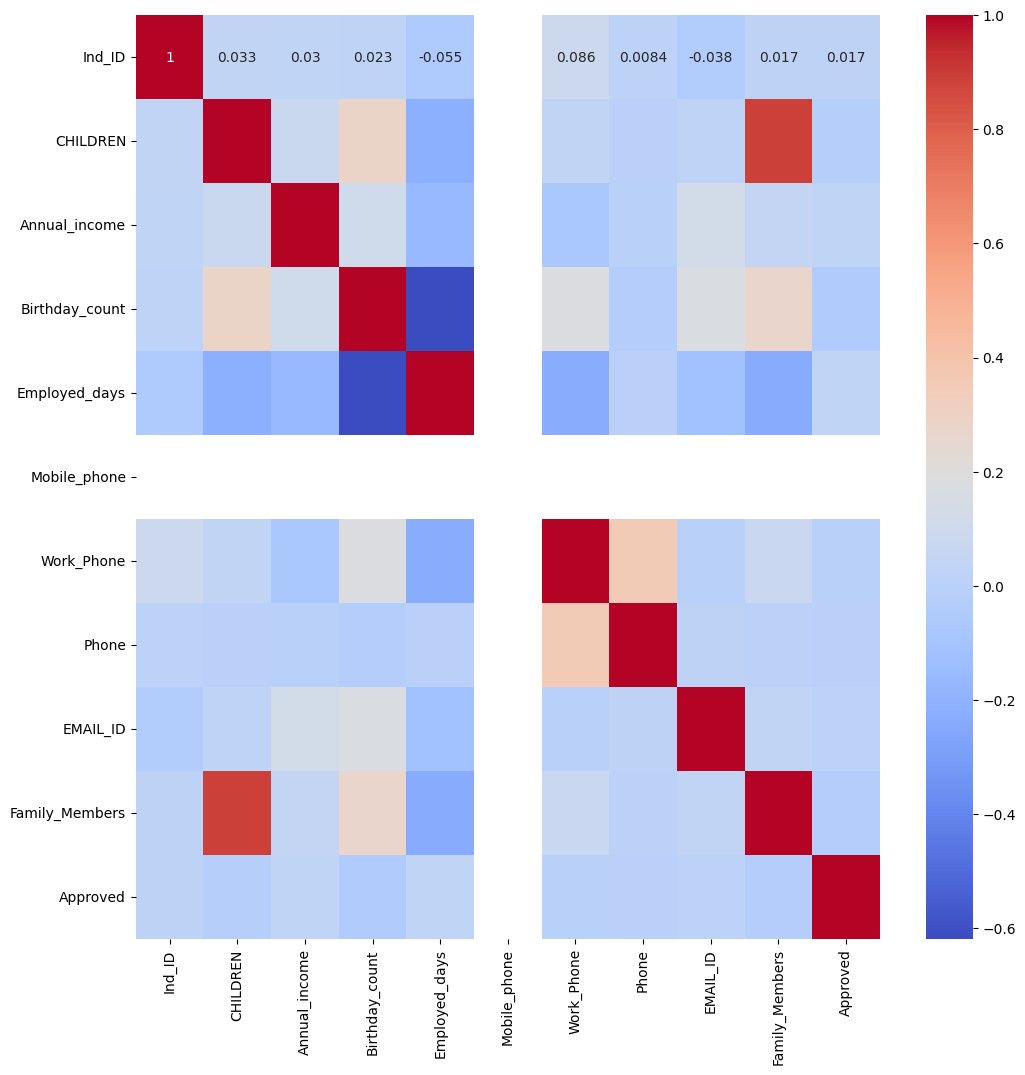

In [10]:
correlation = df.corr(method='pearson',numeric_only=True)
plt.figure(figsize=(12, 12))  # Установите размер 
sns.heatmap(correlation, annot=True, cmap='coolwarm') # Тепловая карта
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


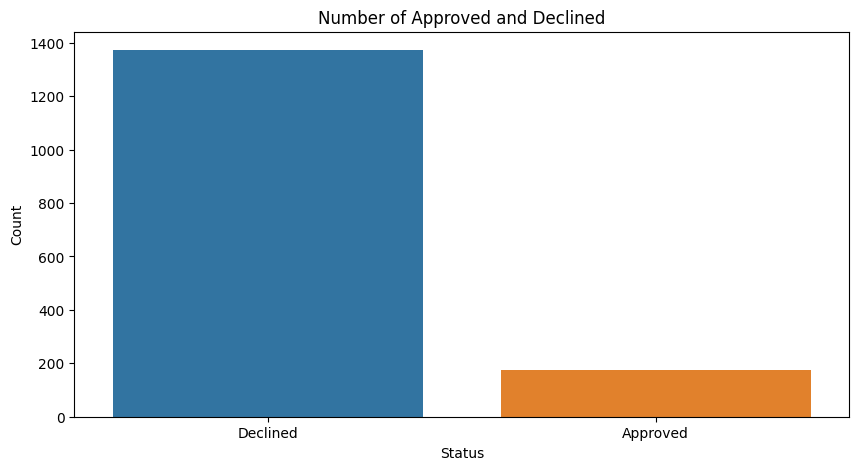

In [11]:


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['Status'].value_counts().index, y=df['Approved'].value_counts().values)
plt.title('Number of Approved and Declined')
plt.ylabel('Count');


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


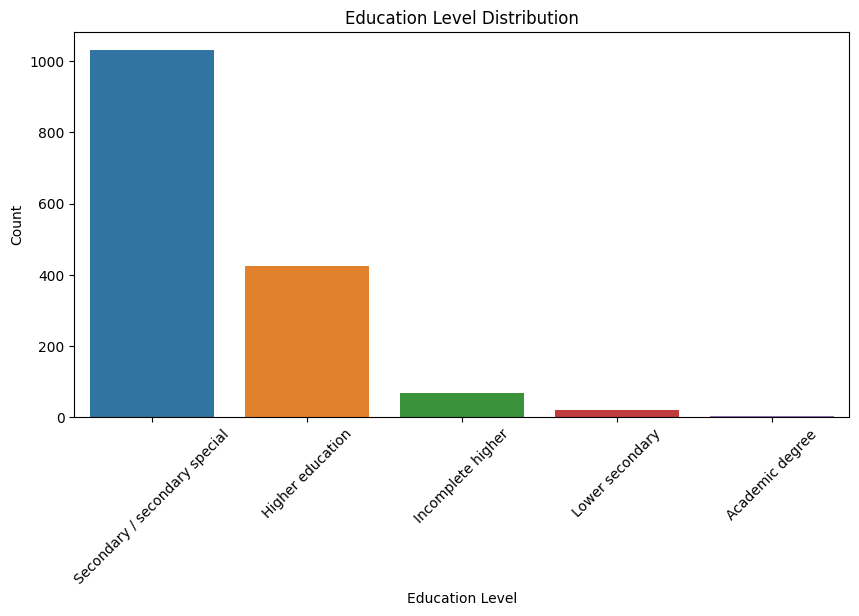

In [12]:
plt.figure(figsize=(10, 5))

eds = df.EDUCATION.value_counts().index
sns.barplot(x=eds, y=df.EDUCATION.value_counts().values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show();


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


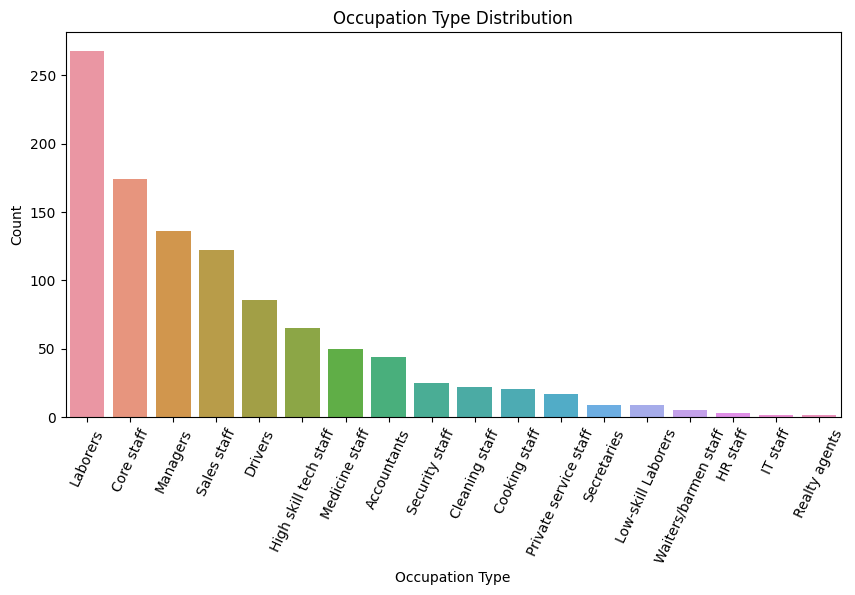

In [13]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Occupation.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation=65)
plt.show();


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


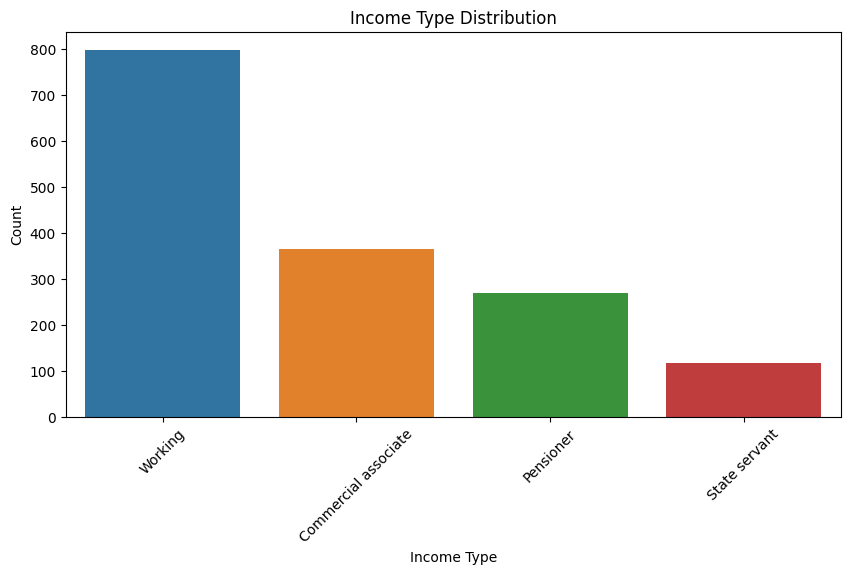

In [14]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Income.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Income.value_counts().values)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Income Type Distribution')
plt.xticks(rotation=45)
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


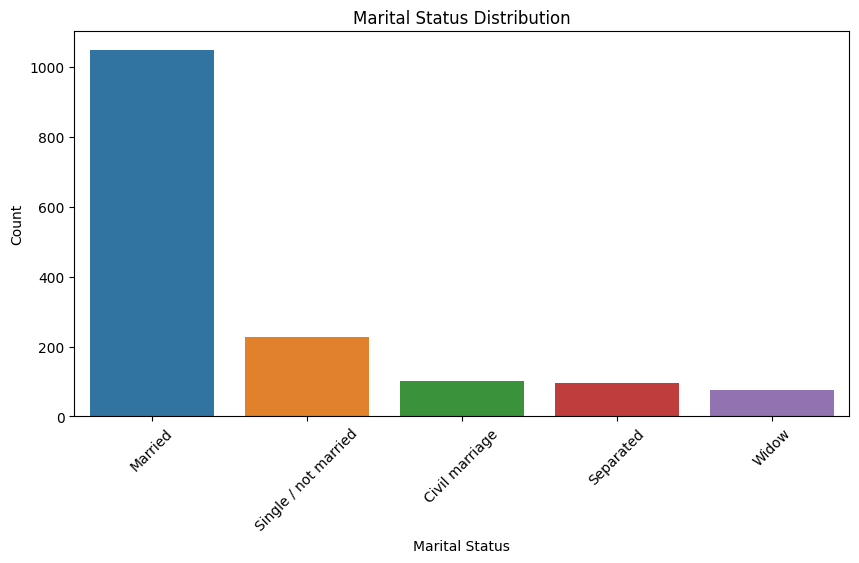

In [15]:
plt.figure(figsize=(10, 5))

marital_types = df.Marital_status.value_counts().index
sns.barplot(x=marital_types, y=df.Marital_status.value_counts().values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


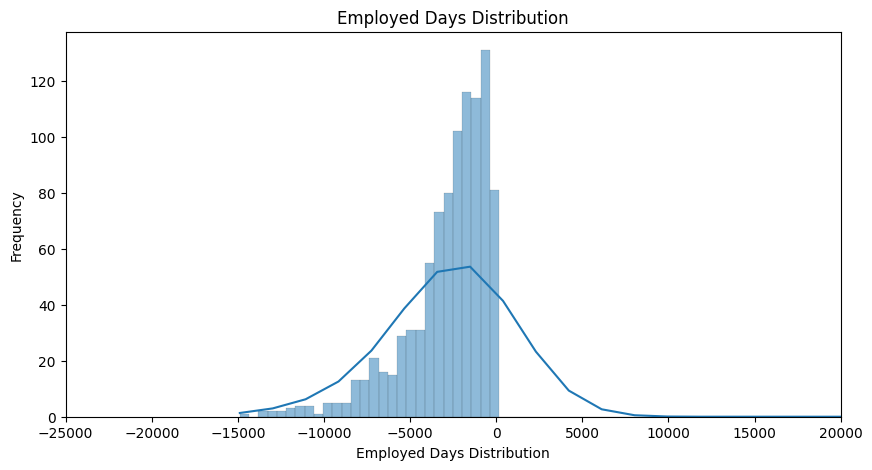

In [16]:
plt.figure(figsize=(10, 5))

emp_days = df.Employed_days.value_counts().index
sns.histplot(x=emp_days, kde=True)
plt.xlabel('Employed Days Distribution')
plt.ylabel('Frequency')
plt.title('Employed Days Distribution')
plt.xlim(-25000, 20000);


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


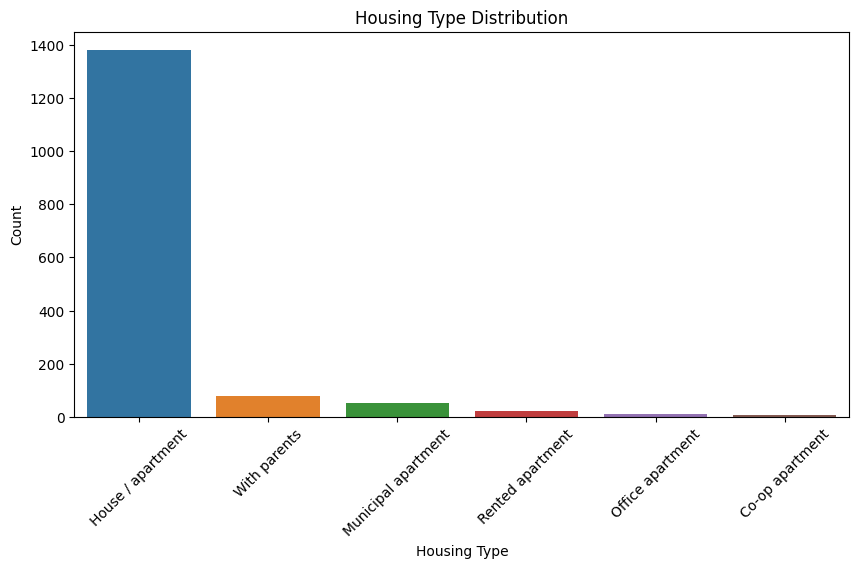

In [17]:
plt.figure(figsize=(10, 5))

housing_types = df.Housing_type.value_counts().index
sns.barplot(x=housing_types, y=df.Housing_type.value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=45)
plt.show()


In [18]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]


In [19]:
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()


# 1. Выбрать подходящую таблицу данных (должна содержать числовые и
категориальные переменные). Временно убрать категориальные признаки.
Построить линейную регрессию.

In [20]:
df_nocats = df.drop(cats,axis=1)
df_nocats


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Approved,Status,Age,EmployedDaysOnly,UnemployedDaysOnly
0,5008827,0,180000.0,-18772.0,365243,2,1,Approved,51.0,365243,0
1,5009744,0,315000.0,-13557.0,-586,2,1,Approved,37.0,0,586
2,5009746,0,315000.0,-22655.0,-586,2,1,Approved,37.0,0,586
3,5009749,0,135000.0,-13557.0,-586,2,1,Approved,37.0,0,586
4,5009752,0,315000.0,-13557.0,-586,2,1,Approved,37.0,0,586
...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,135000.0,-11957.0,-2182,2,0,Declined,32.0,0,2182
1544,5023655,0,225000.0,-10229.0,-1209,1,0,Declined,28.0,0,1209
1545,5115992,2,180000.0,-13174.0,-2477,4,0,Declined,36.0,0,2477
1546,5118219,0,270000.0,-15292.0,-645,2,0,Declined,41.0,0,645


In [21]:
X, y = df_nocats[conts].copy(), df_nocats[dep]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)


In [22]:
X_train


,CHILDREN,Family_Members,Annual_income,Age,EmployedDaysOnly,UnemployedDaysOnly
1197,1,3,135000.0,33.0,0,1923
416,2,4,135000.0,34.0,0,1631
1234,0,2,112500.0,52.0,365243,0
31,0,2,112500.0,59.0,365243,0
583,0,2,247500.0,60.0,365243,0
...,...,...,...,...,...,...
1130,0,2,315000.0,44.0,0,309
1294,1,3,202500.0,27.0,0,313
860,2,4,112500.0,35.0,0,217
1459,0,2,171000.0,50.0,0,3853


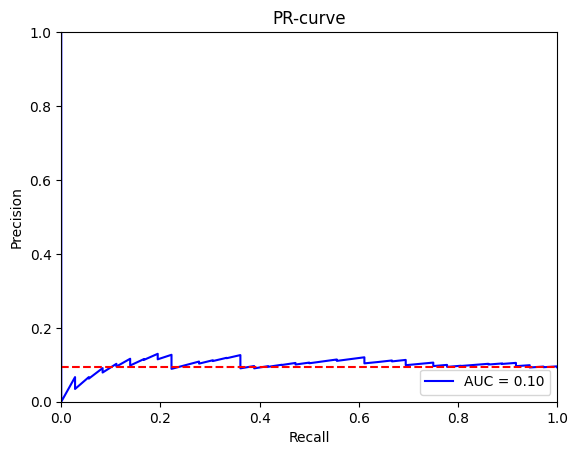

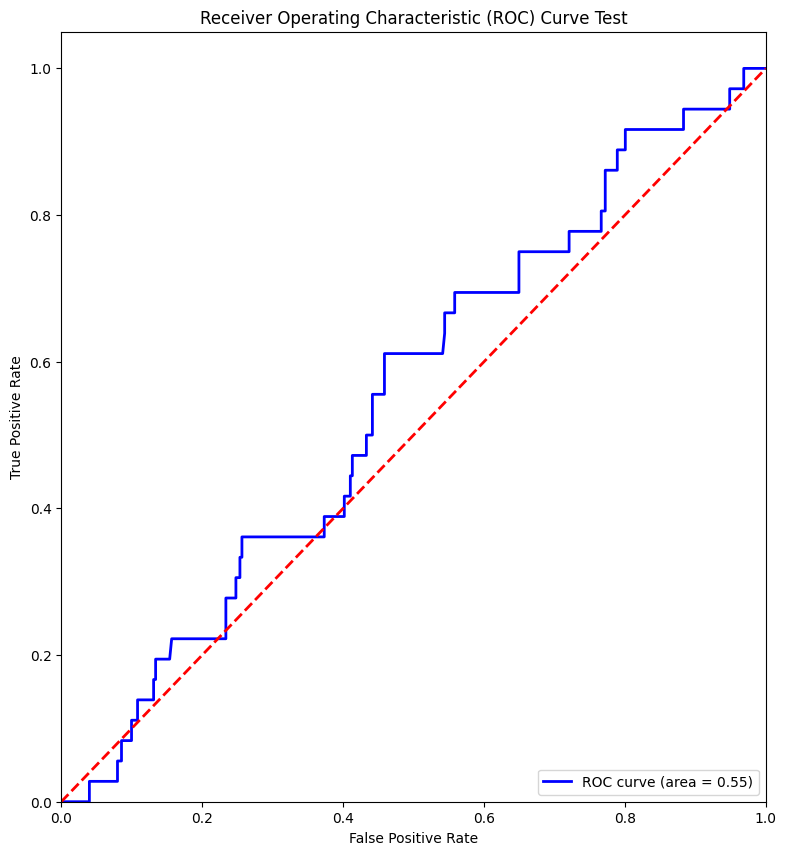

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       351
           1       0.00      0.00      0.00        36

    accuracy                           0.91       387
   macro avg       0.45      0.50      0.48       387
weighted avg       0.82      0.91      0.86       387



e:\PycharmProjects\ML_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\PycharmProjects\ML_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\PycharmProjects\ML_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from matplotlib.colors import ListedColormap


lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict_proba(X_test)[:,1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

plt.title('PR-curve')
plt.plot(recall_lr, precision_lr, 'b', label = 'AUC = %0.2f' % pr_auc_lr)
plt.legend(loc = 'lower right')
noskill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)


plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.scatter([1-specificity], [sensitivity], color='green', label='Specificity & Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Test')
plt.legend(loc="lower right")
plt.show()
y_pred = lr_classifier.predict(X_test)
print(lr_classifier := classification_report(y_test, y_pred))


# 2. Построить решение методом бустинга. Сравнить с линейной регрессией.

AUC: 0.26511378544427927


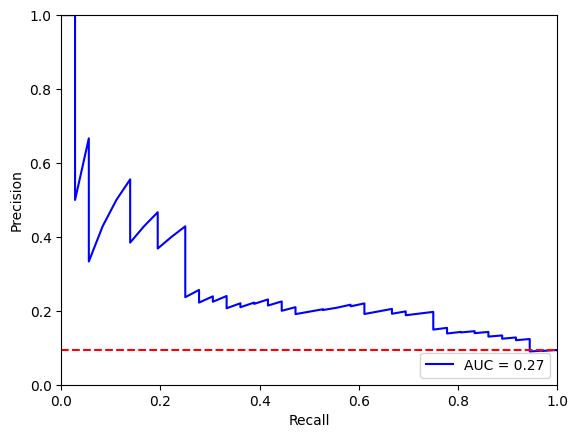

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       351
           1       0.56      0.14      0.22        36

    accuracy                           0.91       387
   macro avg       0.74      0.56      0.59       387
weighted avg       0.88      0.91      0.88       387



In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict_proba(X_test)[:,1]

# Оценка точности
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
y_pred = model.predict(X_test)
print(boost := classification_report(y_test, y_pred))


3. Применить one hot и target encoding для категориальных признаков (взять данные,
где такие признаки есть). Сравнить точность.

In [ ]:
df_noconts = df.drop(conts,axis=1)
df_noconts = df.drop(["Birthday_count","Employed_days","Annual_income","Age","EmployedDaysOnly","UnemployedDaysOnly","Status","Family_Members","CHILDREN"],axis=1)
df_noconts


,Ind_ID,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Approved
0,5008827,M,Y,Y,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,1
1,5009744,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,1
2,5009746,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,1
3,5009749,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,1
4,5009752,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,0
1544,5023655,F,N,N,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,0
1545,5115992,M,Y,Y,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,0
1546,5118219,M,Y,N,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,0


In [ ]:
ohe = OneHotEncoder()

X, y = df_noconts[cats].copy(), df_noconts[dep]

# X_over, y_over = RandomOverSampler().fit_resample(X, y)
transformed = ohe.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.25,random_state=42)


AUC: 0.16009839732643635


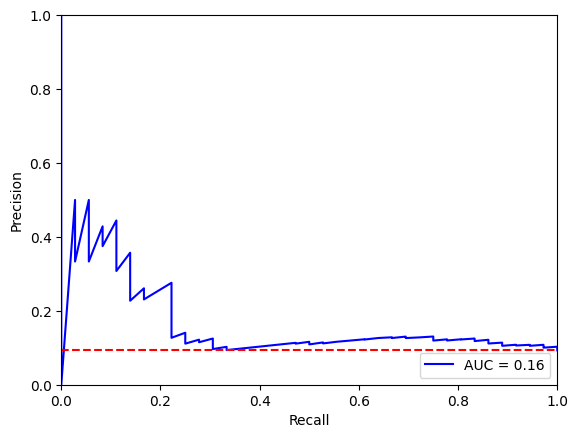

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       351
           1       0.33      0.11      0.17        36

    accuracy                           0.90       387
   macro avg       0.62      0.54      0.56       387
weighted avg       0.86      0.90      0.87       387



In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict_proba(X_test)[:,1]

# Оценка точности
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
y_pred = model.predict(X_test)
print(boost := classification_report(y_test, y_pred))


AUC: 0.29462238341526203


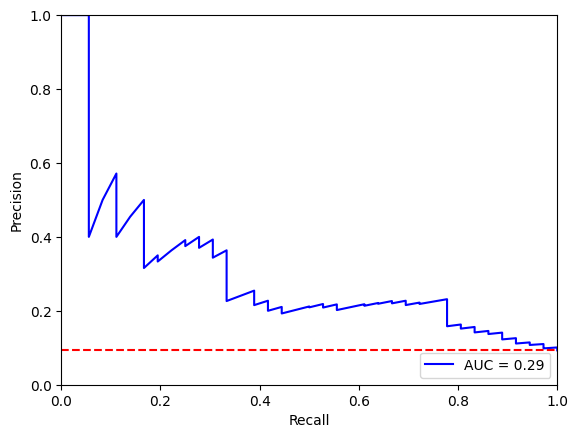

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       351
           1       0.50      0.11      0.18        36

    accuracy                           0.91       387
   macro avg       0.71      0.55      0.57       387
weighted avg       0.88      0.91      0.88       387



In [ ]:
X, y = df[cats + conts].copy(), df[dep]

X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_test[cats] = X_test[cats].apply(lambda x: x.cat.codes)


model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict_proba(X_test)[:,1]

# Оценка точности
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
y_pred = model.predict(X_test)
print(boost := classification_report(y_test, y_pred))



In [ ]:
X, y = df[conts].copy(), df[dep]

X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,random_state=42)


In [ ]:
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)


        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)


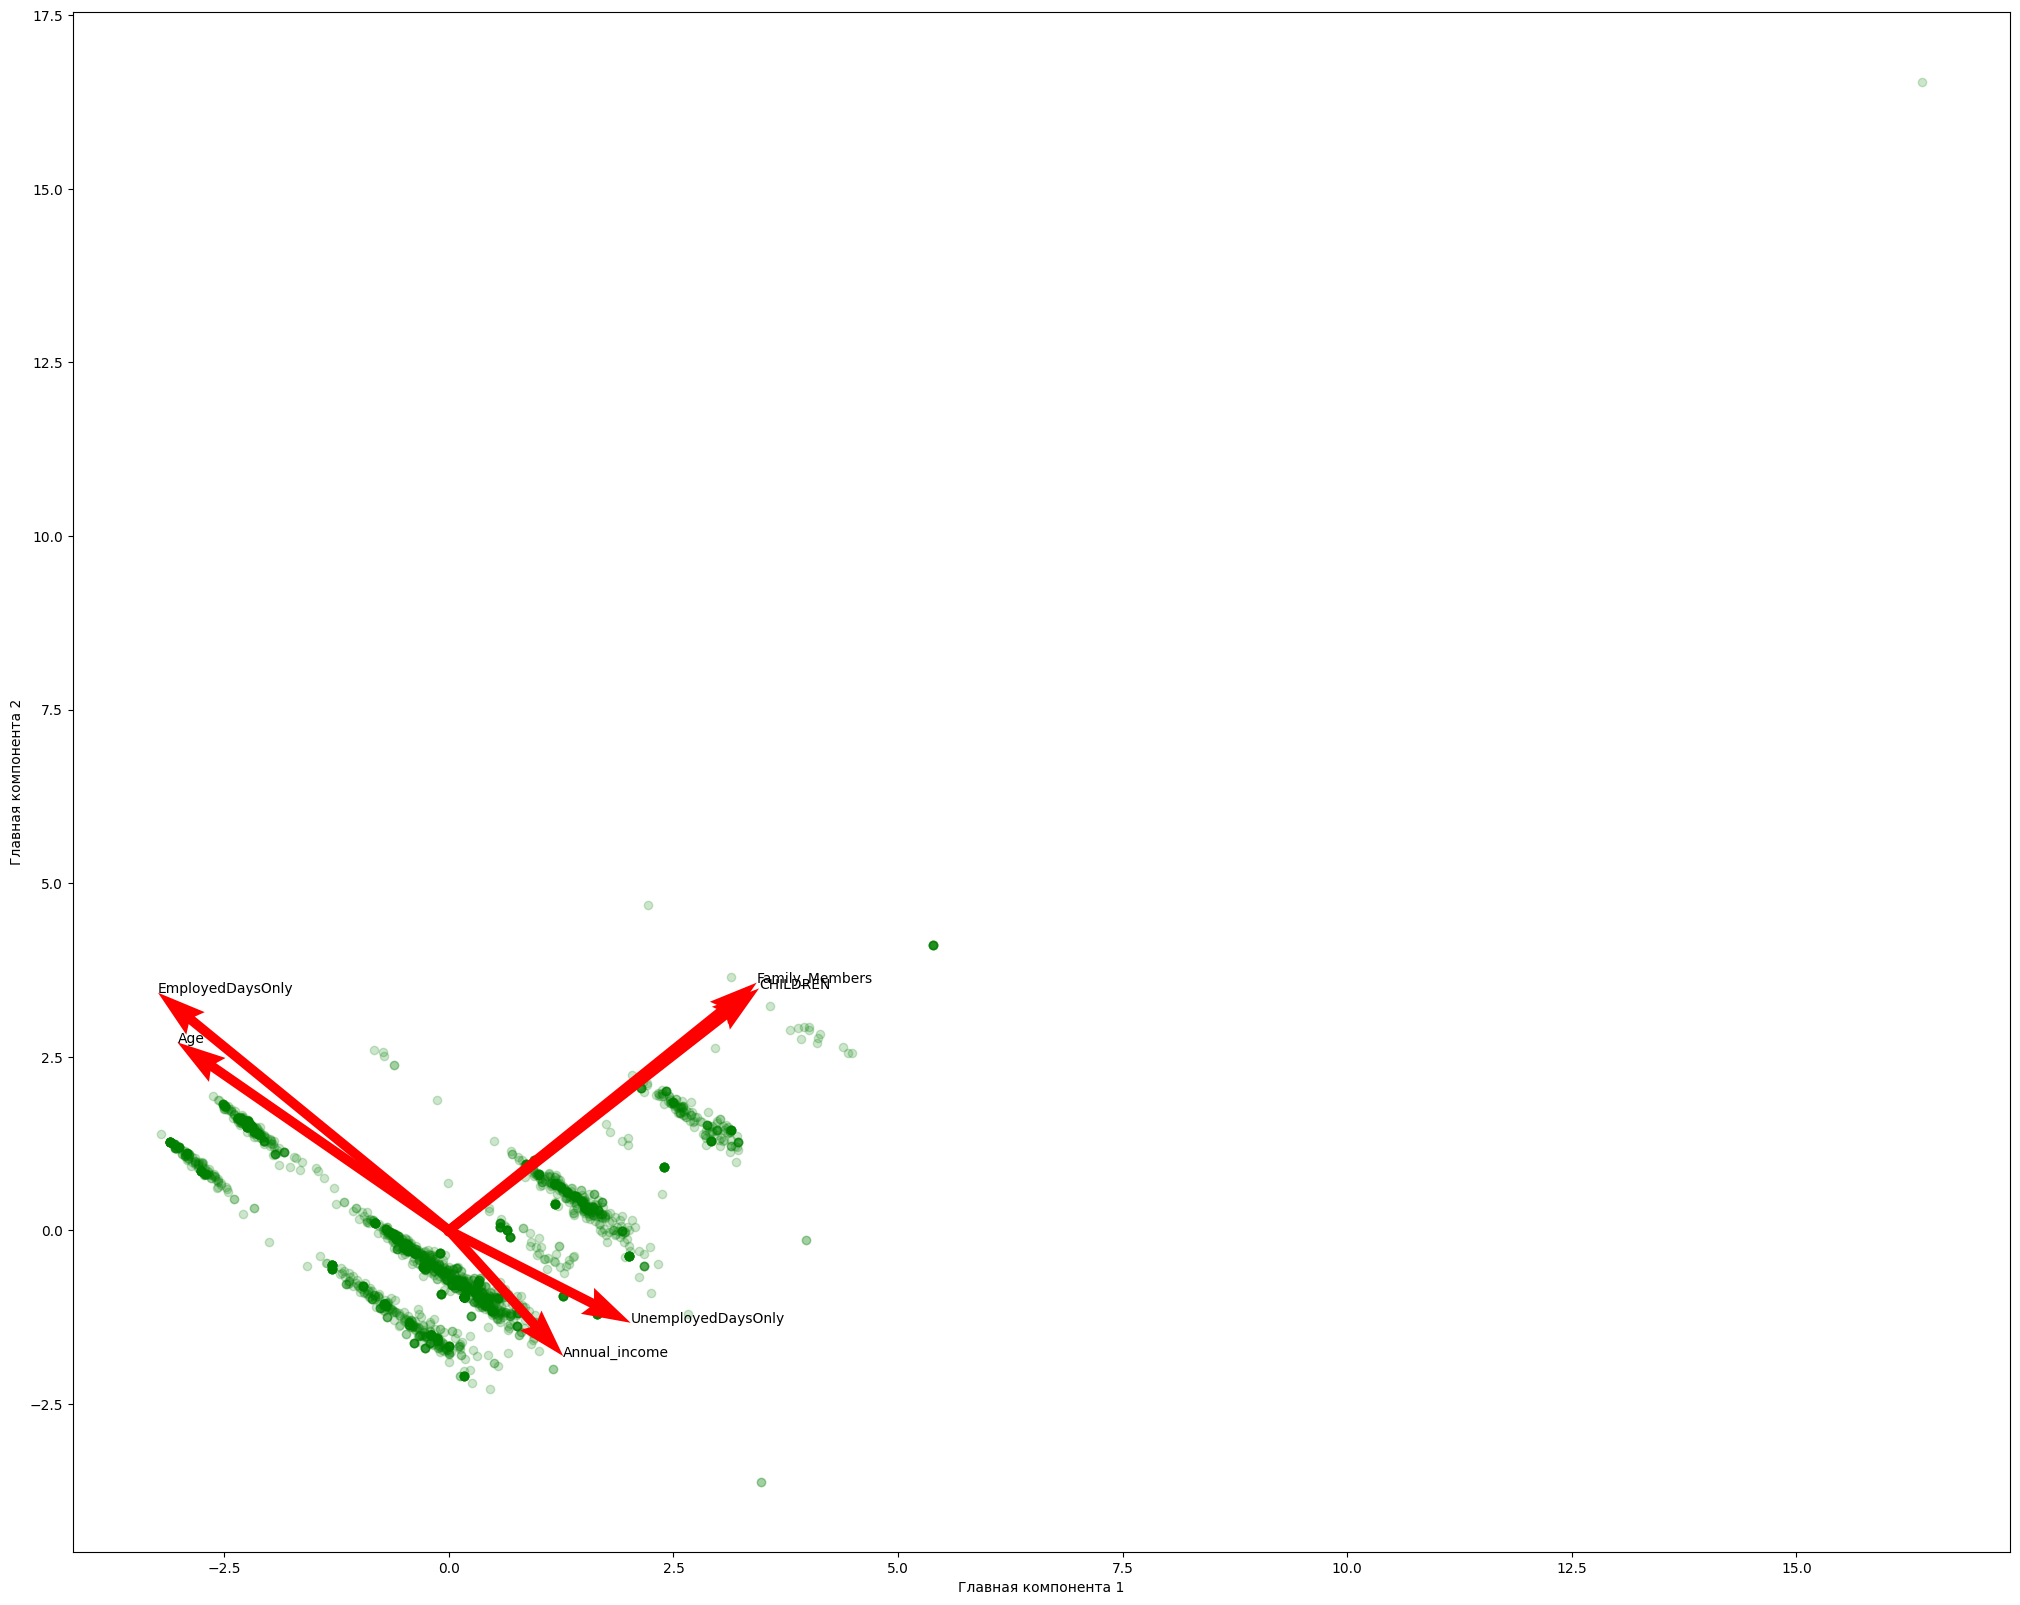

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

componetns_scale = 7

fig = plt.figure(figsize=(25, 20))

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_norm = scaler.fit_transform(X_over) 
X_pca = pca.fit_transform(x_train_norm)
pca_components = pca.components_[:2, :]
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='green', alpha=0.2)
plt.scatter(0, 0, color='red', lw=3)
for i, feature in enumerate(X_over.columns):
    plt.quiver(0, 0, pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale, angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
    plt.annotate(feature, (pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale), color='black')

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()
